# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [136]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor




from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
#Read and save the used car vehicles CSV to a dataframe
vehicles = pd.read_csv('data/vehicles.csv')

In [10]:
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [11]:
vehicles.info()
# Understanding attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
vehicles.describe()
# Understanding Numerical attributes

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [13]:
vehicles = vehicles.drop(['id'], axis=1)  # The 'id' attribute will not be used to determine the cost of the vehicle.
vehicles.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

## Types of Attributes 

Based on the initial analysis, following are the attributes available to us in the data. These attributes have been manipulated to create statistical models for inferring what factors contribute to teh price of a vehicle. 

#### Text-based Attributes
- Manufacturer: Who built the vehicle (examples: Nissan, Volvo, Cadillac, etc.)
- Model: Name of the model (eg: 'maxima s sedan 4d' , 's60 t5 momentum sedan 4d' etc.)
- Condition: How the vehicle runs and whether any cosmetic damages ('good', 'excellent', 'fair', 'like new', etc.)
- Cylinders: No of cylinders in the engine ('8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', etc.)
- Fuel: Type of fuel ('gas', 'other', 'diesel', 'hybrid', 'electric', etc.)
- Title Status: Accident information ('clean', 'rebuilt', 'lien', 'salvage', etc.)
- Transmission: What transmission the car uses ('manual','automatic', etc.)
- Drive: Whether the car is Rear-wheel drive or other types ('rwd', '4wd', 'fwd', etc.)
- Size: Size of the Vehicle ('full-size', 'mid-size', 'compact', 'sub-compact', etc.)
- Type: Vehicle Body Style ('pickup', 'truck', 'other', 'coupe', 'SUV', etc.)
- Paint Color: Exterior color of the vehicle ('white','purple', 'red', etc.)

#### Numerical Attribtues
- Odometer: The amount of miles driven on the used vehicle [Min(0); Max(10000000.0); Mean(98043.33); Median(85548.0); std(213881.50)]
- Price: The price of the vehicle [Min(0); Max(3736928711); Mean(75199.03); Median (13950.0); std(12182282.17)]

#### Spatial Attributes
- Region: Cities in the USA
- State: States in the USA

#### Temporal Attributes
- Year: Vehicle Model Year (~1960-2022)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

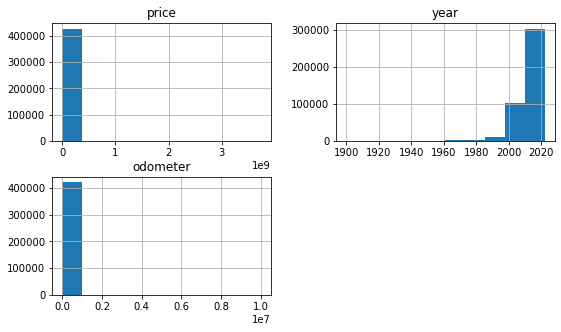

In [14]:
vehicle_numerical_att = vehicles[['price','year','odometer']]
vehicle_numerical_att.hist(bins=10, figsize=(9,5))

<AxesSubplot:xlabel='odometer', ylabel='year'>

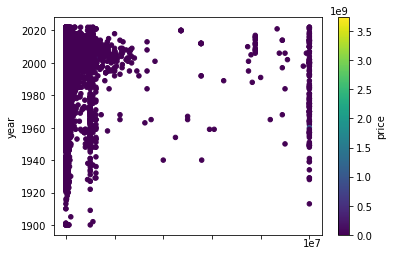

In [15]:
vehicle_numerical_att = vehicle_numerical_att.dropna(axis=0)
vehicle_numerical_att.plot.scatter(x='odometer',y='year',c='price',
                      colormap='viridis')

<AxesSubplot:xlabel='price', ylabel='year'>

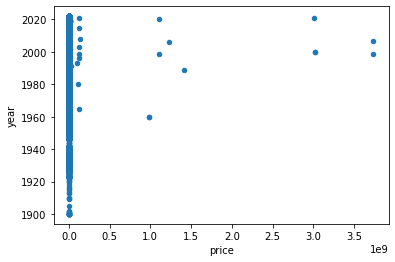

In [16]:
vehicle_numerical_att.plot.scatter(x='price',y='year')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Step x: Changing Dtype Attributes

In [17]:
# vehicles.info()
vehicles_cleaned = vehicles.convert_dtypes()
vehicles_cleaned

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,prescott,6000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,az
1,fayetteville,11900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ar
2,florida keys,21000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,fl
3,worcester / central MA,1500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ma
4,greensboro,4900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,1N4AA6AV6KC367801,fwd,<NA>,sedan,<NA>,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,<NA>,gas,12029,clean,other,7JR102FKXLG042696,fwd,<NA>,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,<NA>,diesel,4174,clean,other,1GYFZFR46LF088296,<NA>,<NA>,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,58ABK1GG4JU103853,fwd,<NA>,sedan,silver,wy


In [18]:
vehicles_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   price         426880 non-null  Int64 
 2   year          425675 non-null  Int64 
 3   manufacturer  409234 non-null  string
 4   model         421603 non-null  string
 5   condition     252776 non-null  string
 6   cylinders     249202 non-null  string
 7   fuel          423867 non-null  string
 8   odometer      422480 non-null  Int64 
 9   title_status  418638 non-null  string
 10  transmission  424324 non-null  string
 11  VIN           265838 non-null  string
 12  drive         296313 non-null  string
 13  size          120519 non-null  string
 14  type          334022 non-null  string
 15  paint_color   296677 non-null  string
 16  state         426880 non-null  string
dtypes: Int64(3), string(14)
memory usage: 56.6 MB


#### Step x: Convert attributes to Categorical / Numerical 

In [19]:
#  All the following attributes can be converted to numerical or categorical.
print(vehicles_cleaned['cylinders'].unique())
print(vehicles_cleaned['transmission'].unique())
print(vehicles_cleaned['drive'].unique())
print(vehicles_cleaned['fuel'].unique())
print(vehicles_cleaned['type'].unique())
print(vehicles_cleaned['title_status'].unique())
print(vehicles_cleaned['size'].unique())


<StringArray>
[          <NA>,  '8 cylinders',  '6 cylinders',  '4 cylinders',
  '5 cylinders',        'other',  '3 cylinders', '10 cylinders',
 '12 cylinders']
Length: 9, dtype: string
<StringArray>
[<NA>, 'other', 'automatic', 'manual']
Length: 4, dtype: string
<StringArray>
[<NA>, 'rwd', '4wd', 'fwd']
Length: 4, dtype: string
<StringArray>
[<NA>, 'gas', 'other', 'diesel', 'hybrid', 'electric']
Length: 6, dtype: string
<StringArray>
[         <NA>,      'pickup',       'truck',       'other',       'coupe',
         'SUV',   'hatchback',    'mini-van',       'sedan',     'offroad',
         'bus',         'van', 'convertible',       'wagon']
Length: 14, dtype: string
<StringArray>
[<NA>, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
Length: 7, dtype: string
<StringArray>
[<NA>, 'full-size', 'mid-size', 'compact', 'sub-compact']
Length: 5, dtype: string


In [20]:
# Cylinders 
vehicles_cleaned['cylinders'] = vehicles_cleaned['cylinders'].str.replace(r' cylinders','')
vehicles_cleaned['cylinders'] = vehicles_cleaned['cylinders'].str.replace(r'other','0')
vehicles_cleaned[['cylinders']] = vehicles_cleaned[['cylinders']].fillna('0')
vehicles_cleaned.cylinders = vehicles_cleaned.cylinders.astype(np.int64)
vehicles_cleaned['cylinders'].value_counts()

0     178976
6      94169
4      77642
8      72062
5       1712
10      1455
3        655
12       209
Name: cylinders, dtype: int64

In [21]:
# Transmission
vehicles_cleaned['transmission'] = vehicles_cleaned['transmission'].str.replace(r'other','0')
vehicles_cleaned['transmission'] = vehicles_cleaned['transmission'].str.replace(r'automatic','1')
vehicles_cleaned['transmission'] = vehicles_cleaned['transmission'].str.replace(r'manual','2')
vehicles_cleaned[['transmission']] = vehicles_cleaned[['transmission']].fillna('0')
vehicles_cleaned.transmission = vehicles_cleaned.transmission.astype(np.int64)
vehicles_cleaned['transmission'].value_counts()

1    336524
0     65238
2     25118
Name: transmission, dtype: int64

In [22]:
# Drive
vehicles_cleaned['drive'] = vehicles_cleaned['drive'].str.replace(r'4wd','1')
vehicles_cleaned['drive'] = vehicles_cleaned['drive'].str.replace(r'fwd','2')
vehicles_cleaned['drive'] = vehicles_cleaned['drive'].str.replace(r'rwd','3')
vehicles_cleaned[['drive']] = vehicles_cleaned[['drive']].fillna('0')
vehicles_cleaned.drive = vehicles_cleaned.drive.astype(np.int64)
vehicles_cleaned['drive'].value_counts()

1    131904
0    130567
2    105517
3     58892
Name: drive, dtype: int64

#### Step x: Handling NULL/ NA values

In [23]:
vehicles_cleaned[['fuel']] = vehicles_cleaned[['fuel']].fillna('other')
vehicles_cleaned['fuel'].value_counts()

gas         356209
other        33741
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: Int64

In [24]:
vehicles_cleaned[['type']] = vehicles_cleaned[['type']].fillna('other')
vehicles_cleaned['type'].value_counts()

other          114968
sedan           87056
SUV             77284
pickup          43510
truck           35279
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: type, dtype: Int64

In [25]:
vehicles_cleaned[['model']] = vehicles_cleaned[['model']].fillna('Other')
vehicles_cleaned.loc[(vehicles_cleaned.model=='♿'),'model'] = 'other'
vehicles_cleaned['model'].value_counts()

f-150                                      8009
Other                                      5362
silverado 1500                             5140
1500                                       4211
camry                                      3135
                                           ... 
mustang gt 350                                1
sierra 3500hd denali duramax                  1
328 m sport xdrive                            1
pickup laramie                                1
mx 3 i *fr $399 down guaranteed finance       1
Name: model, Length: 29648, dtype: Int64

In [26]:
vehicles_cleaned[['title_status']] = vehicles_cleaned[['title_status']].fillna('missing')
vehicles_cleaned.loc[(vehicles_cleaned.title_status=='other'), 'title_status'] = 'missing'
vehicles_cleaned['title_status'].value_counts()

clean         405117
missing         9056
rebuilt         7219
salvage         3868
lien            1422
parts only       198
Name: title_status, dtype: Int64

In [27]:
vehicles_cleaned[['paint_color']] = vehicles_cleaned[['paint_color']].fillna('other')
vehicles_cleaned.loc[(vehicles_cleaned.paint_color==('custom')) | (vehicles_cleaned.paint_color==('missing')),'paint_color'] = 'other'
vehicles_cleaned['paint_color'].value_counts()

other     136903
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
brown       6593
yellow      2142
orange      1984
purple       687
Name: paint_color, dtype: Int64

In [28]:
vehicles_cleaned[['size']] = vehicles_cleaned[['size']].fillna('missing')
vehicles_cleaned['size'].value_counts()

missing        306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: size, dtype: Int64

In [29]:
vehicles_cleaned.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model                0
condition       174104
cylinders            0
fuel                 0
odometer          4400
title_status         0
transmission         0
VIN             161042
drive                0
size                 0
type                 0
paint_color          0
state                0
dtype: int64

#### Step x: Removing Outliers

In [30]:
# Reducing The huge variance in numerical attributes
first_quartile = vehicles_cleaned['price'].quantile(.25)
third_quartile = vehicles_cleaned['price'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_cleaned = vehicles_cleaned.loc[(vehicles_cleaned['price']>lower) & (vehicles_cleaned['price']<upper)]

first_quartile = vehicles_cleaned['odometer'].quantile(.25)
third_quartile = vehicles_cleaned['odometer'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_cleaned = vehicles_cleaned.loc[(vehicles_cleaned['odometer']>lower) & (vehicles_cleaned['odometer']<upper)]

first_quartile = vehicles_cleaned['year'].quantile(.25)
third_quartile = vehicles_cleaned['year'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_cleaned = vehicles_cleaned.loc[(vehicles_cleaned['year']>lower) & (vehicles_cleaned['year']<upper)]

In [31]:
vehicles_cleaned.isnull().sum()

region               0
price                0
year                 0
manufacturer     12345
model                0
condition       159841
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             141377
drive                0
size                 0
type                 0
paint_color          0
state                0
dtype: int64

In [45]:
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='salvage') &
                         ((vehicles_cleaned.price>=0) & (vehicles_cleaned.price<=500))), 'condition'] = 'salvage'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         ((vehicles_cleaned.price>=0)&(vehicles_cleaned.price<=500))), 'condition'] = 'salvage'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         ((vehicles_cleaned.price>=501)&(vehicles_cleaned.price<=2000))), 'condition'] = 'fair'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         ((vehicles_cleaned.price>=2001)&(vehicles_cleaned.price<=13495))), 'condition'] = 'good'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         ((vehicles_cleaned.price>=13496)&(vehicles_cleaned.price<=25000))), 'condition'] = 'excellent'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         ((vehicles_cleaned.price>=25001)&(vehicles_cleaned.price<=40000))), 'condition'] = 'like new'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.title_status=='missing') &
                         (vehicles_cleaned.price>40000)), 'condition'] = 'new'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & 
                         ((vehicles_cleaned.price>=0)&(vehicles_cleaned.price<=2000))), 'condition'] = 'salvage'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & 
                         ((vehicles_cleaned.price>=2001)&(vehicles_cleaned.price<=5000))), 'condition'] = 'fair'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & 
                         ((vehicles_cleaned.price>=5001)&(vehicles_cleaned.price<=13495))), 'condition'] = 'good'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & 
                         ((vehicles_cleaned.price>=13496)&(vehicles_cleaned.price<=25000))), 'condition'] = 'excellent'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & 
                         ((vehicles_cleaned.price>=25001)&(vehicles_cleaned.price<=40000))), 'condition'] = 'like new'
vehicles_cleaned.loc[((vehicles_cleaned.condition.isnull()) & (vehicles_cleaned.price>40000)), 'condition'] = 'new'

#### Visualizations / Graphs

In [79]:
vehicles_cleaned = vehicles_cleaned.drop(columns='VIN')
final_data = vehicles_cleaned.copy()

Text(0.5, 1.0, 'Count of used cars over the years')

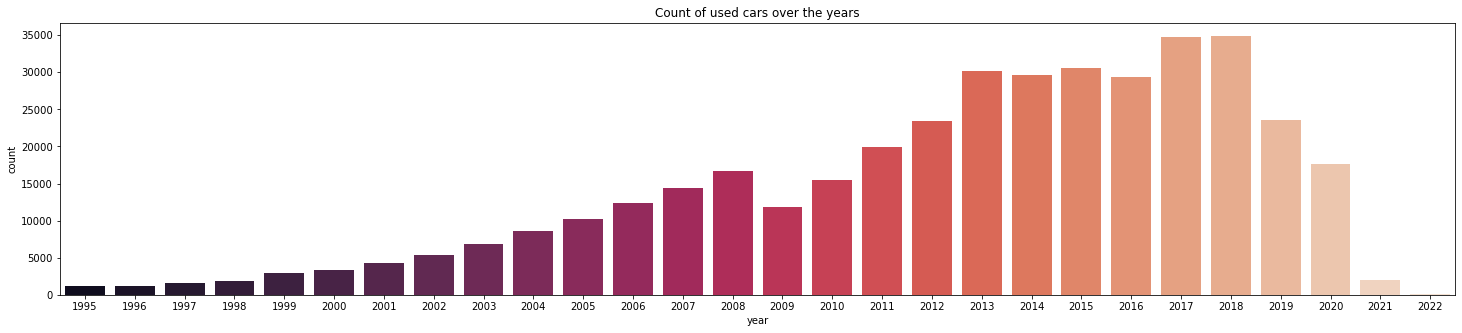

In [42]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,5
sns.countplot(data=final_data, x='year',palette='rocket')
plt.title('Count of used cars over the years')

Text(0.5, 1.0, 'Price of used cars over the years')

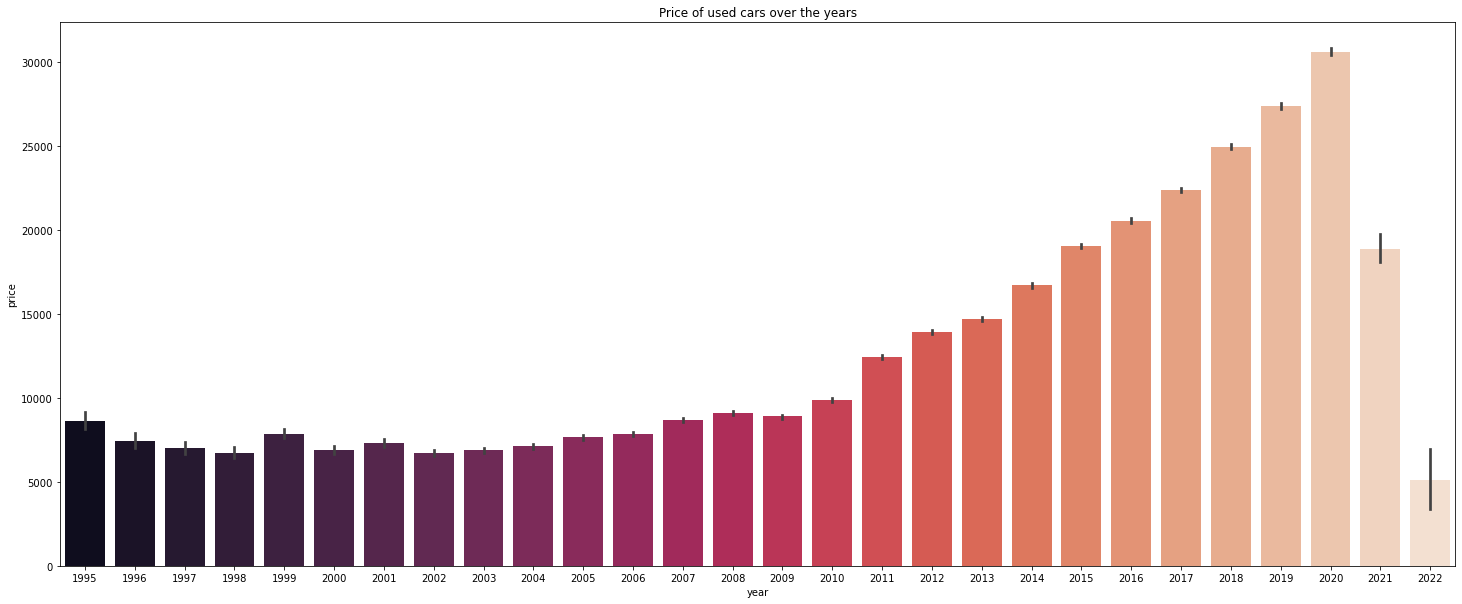

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,10
sns.barplot(data=final_data, x='year', y='price', palette='rocket')
plt.title('Price of used cars over the years')

Text(0.5, 1.0, 'Usage of Cars over the years')

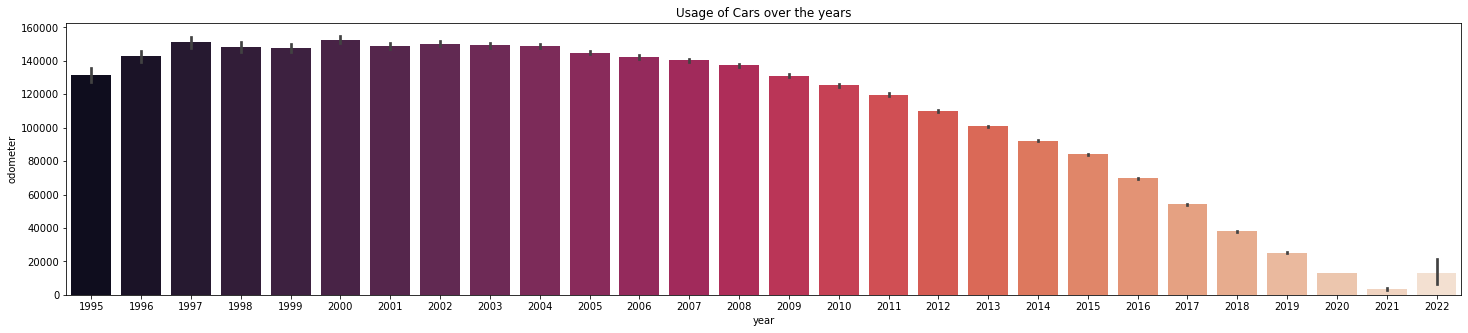

In [36]:
rcParams['figure.figsize'] = 25,5
sns.barplot(data=final_data, x='year',y='odometer' ,palette='rocket')
plt.title('Usage of Cars over the years')

Text(0.5, 1.0, 'Price of Cars per Manufacturer')

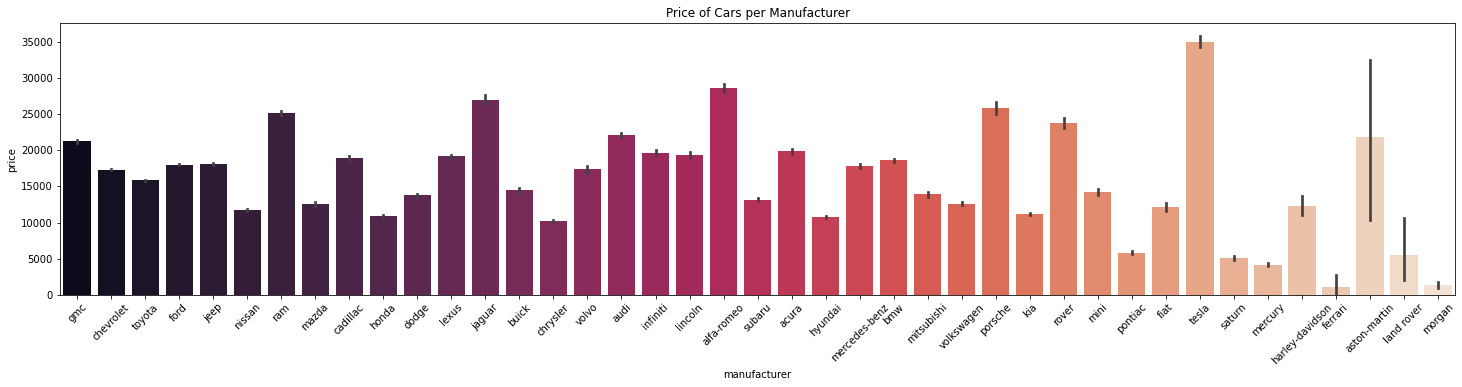

In [37]:
rcParams['figure.figsize'] = 25,5
sns.barplot(data=final_data, x='manufacturer',y='price' ,palette='rocket')
plt.xticks(rotation=45)
plt.title('Price of Cars per Manufacturer')

Text(0.5, 1.0, 'Fuel type of used cars and price impact')

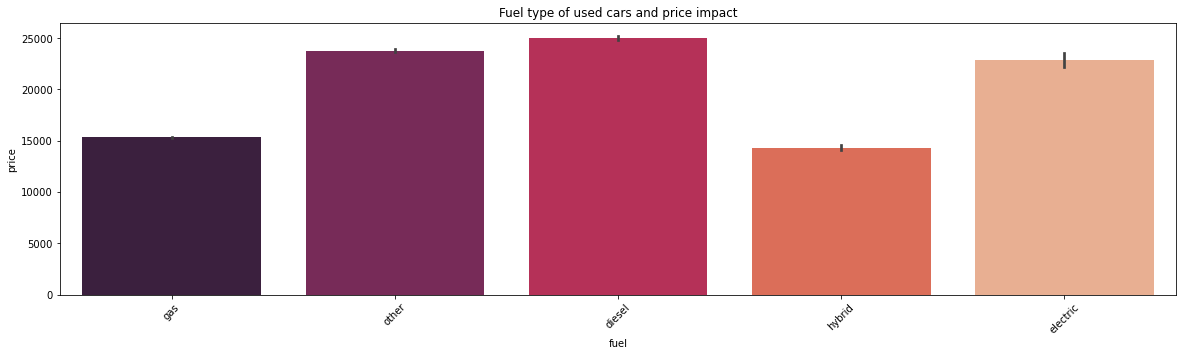

In [38]:
#Fuel type of used cars and its impact to price
rcParams['figure.figsize'] = 20,5
sns.barplot(data=final_data, x='fuel', y='price', palette='rocket')
plt.xticks(rotation=45)
plt.title('Fuel type of used cars and price impact')

<AxesSubplot:xlabel='price', ylabel='Density'>

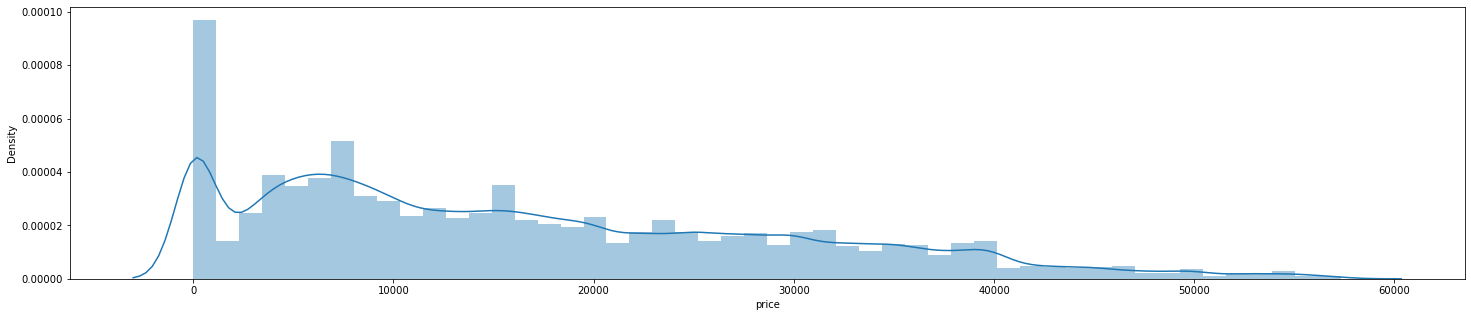

In [44]:
sns.distplot(final_data.price)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Encoding

In [88]:
numeric_col = ['price', 'year', 'cylinders', 'transmission', 'drive', 'odometer']
categorical_col = ['region', 'model', 'condition', 'fuel', 'title_status', 'size', 'type', 'paint_color', 'state']

In [89]:
vehicles_cleaned.isnull().sum()

region              0
price               0
year                0
manufacturer    12345
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [94]:
label_encoder = preprocessing.LabelEncoder()
final_data[cat_cols]=final_data[cat_cols].apply(label_encoder.fit_transform)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347852 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        347852 non-null  int64  
 1   price         347852 non-null  float64
 2   year          347852 non-null  float64
 3   manufacturer  337857 non-null  string 
 4   model         347852 non-null  int64  
 5   condition     347852 non-null  int64  
 6   cylinders     347852 non-null  int64  
 7   fuel          347852 non-null  int64  
 8   odometer      347852 non-null  float64
 9   title_status  347852 non-null  int64  
 10  transmission  347852 non-null  int64  
 11  drive         347852 non-null  int64  
 12  size          347852 non-null  int64  
 13  type          347852 non-null  int64  
 14  paint_color   347852 non-null  int64  
 15  state         347852 non-null  string 
dtypes: float64(3), int64(11), string(2)
memory usage: 45.1 MB


In [95]:
final_data = final_data.drop(columns=['state','manufacturer'])

#### Scaling

In [96]:
norm = StandardScaler()
final_data['price'] = np.log(final_data['price'])
final_data['odometer'] = norm.fit_transform(np.array(final_data['odometer']).reshape(-1,1))
final_data['year'] = norm.fit_transform(np.array(final_data['year']).reshape(-1,1))
final_data['model'] = norm.fit_transform(np.array(final_data['model']).reshape(-1,1))

#scaling target variable
q1,q3=(final_data['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
final_data=final_data[(final_data.price>=o1) & (final_data.price<=o2)]

final_data['region'] = norm.fit_transform(np.array(final_data['region']).reshape(-1,1))

#### Helper Functions

In [117]:
X = final_data.drop(columns='price', axis=1)
y = final_data['price']
print(type(X), type(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=256)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [141]:
def remove_negatives(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def get_results(y_test,y_pred):
    results=[]
    results.append(mean_squared_log_error(y_test, y_pred))
    results.append(np.sqrt(results[0]))
    results.append(r2_score(y_test,y_pred))
    results.append(round(r2_score(y_test,y_pred)*100,4))
    return (results)

final_results=[]

#### Training Models

LinearReg MSE: 0.0001786251912641226
LinearReg RMSE: 0.01336507355999669
LinearReg R2 Score: 57.99992427184784


Text(0.5, 0, 'X_train Values')

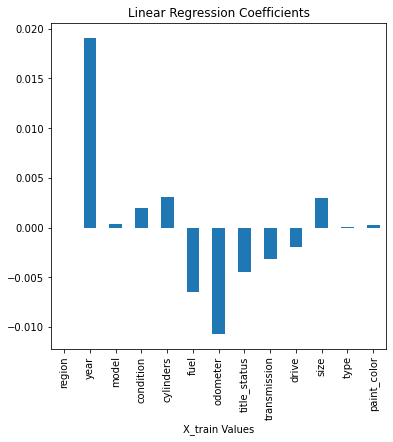

In [169]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
linreg_results = get_results(y_test, y_pred)
print(f'Linear Regression MSE: {linreg_results[0]}')
print(f'Linear Regression RMSE: {linreg_results[1]}')
print(f'Linear Regression R2 Score: {linreg_results[2]*100}')

final_results.append({'Model_name': 'Linear Regression', 'MSE': linreg_results[0], 'RMSE': linreg_results[1], 'R2 Score': linreg_results[2]*100})

linreg_coeffs = pd.Series(linreg.coef_, index=X_train.columns)
linreg_coeffs.plot(kind='bar')
plt.title('Linear Regression Coefficients')
plt.xlabel('X_train Values')

Lasso Grid MSE: 0.0001821880447894458
Lasso Grid RMSE: 0.013497705167525544
Lasso Grid R2 Score: 57.17088011593279
Best alpha: 0.001


Text(0.5, 0, 'X_train Values')

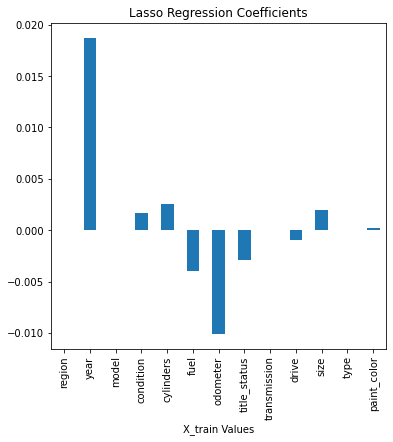

In [170]:
# Lasso Regression

param_dict = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), param_grid=param_dict, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
y_pred2 = lasso_grid.predict(X_test)
lasso_grid_results = get_results(y_test, y_pred2)
print(f'Lasso MSE: {lasso_grid_results[0]}')
print(f'Lasso RMSE: {lasso_grid_results[1]}')
print(f'Lasso R2 Score: {lasso_grid_results[2]*100}')

lasso_best_alpha = lasso_grid.best_params_
print(f'Best alpha: {list(lasso_best_alpha.values())[0]}')

final_results.append({'Model_name': 'Lasso Regression', 'MSE': lasso_grid_results[0], 'RMSE': lasso_grid_results[1], 'R2 Score': lasso_grid_results[2]*100})

lassoreg = Lasso(alpha=0.001).fit(X_train, y_train)
lassoreg_coeffs = pd.Series(lassoreg.coef_, index=X_train.columns)
lassoreg_coeffs.plot(kind='bar')
plt.title('Lasso Regression Coefficients')
plt.xlabel('X_train Values')

Ridge Grid MSE: 0.0001786252947221173
Ridge Grid RMSE: 0.013365077430457234
Ridge Grid R2 Score: 57.999911458596245
Best alpha: 10.0


Text(0.5, 0, 'X_train Values')

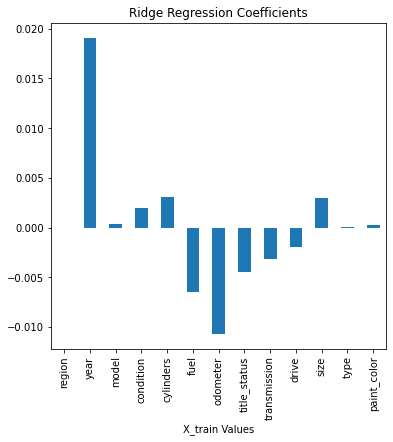

In [171]:
# Ridge Regression
param_dict = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), param_grid=param_dict, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)
y_pred1 = ridge_grid.predict(X_test)
ridge_grid_results = get_results(y_test, y_pred1)
print(f'Ridge MSE: {ridge_grid_results[0]}')
print(f'Ridge RMSE: {ridge_grid_results[1]}')
print(f'Ridge R2 Score: {ridge_grid_results[2]*100}')

ridge_best_alpha = ridge_grid.best_params_
print(f'Best alpha: {list(ridge_best_alpha.values())[0]}')

final_results.append({'Model_name': 'Ridge Regression', 'MSE': ridge_grid_results[0], 'RMSE': ridge_grid_results[1], 'R2 Score': ridge_grid_results[2]*100})

ridgereg = Ridge(alpha=10.0).fit(X_train, y_train)
ridgereg_coeffs = pd.Series(ridgereg.coef_, index=X_train.columns)
ridgereg_coeffs.plot(kind='bar')
plt.title('Ridge Regression Coefficients')
plt.xlabel('X_train Values')

In [174]:
#  KNN Regressor

from sklearn.neighbors import KNeighborsRegressor

# mses=[]
# for i in range(1,10):
#     KNN=KNeighborsRegressor(n_neighbors=i)
#     KNN.fit(X_train,y_train)
#     y_pred=KNN.predict(X_test)
#     results=np.sqrt(mean_squared_error(y_test, y_pred))
#     mses.append(results)
# print(mses)

# Finding best k=6 using the code above.
KNN=KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train,y_train)
y_pred3=KNN.predict(X_test)
KNN_results = get_results(y_test, y_pred3)
print(f'KNN MSE: {KNN_results[0]}')
print(f'KNN RMSE: {KNN_results[1]}')
print(f'KNN R2 Score: {KNN_results[2]*100}')

final_results.append({'Model_name': 'KNN Regression', 'MSE': KNN_results[0], 'RMSE': KNN_results[1], 'R2 Score': KNN_results[2]*100})

KNN MSE: 7.618346463552377e-05
KNN RMSE: 0.008728313962932575
KNN R2 Score: 82.27577915993989


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [173]:
results =pd.DataFrame(final_results)
results

,Model_name,MSE,RMSE,R2 Score
0,Linear Regression,0.000179,0.013365,57.999924
1,Lasso Regression,0.000182,0.013498,57.170880
2,Ridge Regression,0.000179,0.013365,57.999911
3,KNN Regression,0.000081,0.008996,81.184521


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.